In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import os
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
dataset = pd.read_csv("groundnut.csv")

In [41]:
dataset.head()

,Month,Year,Rainfall,Temperature,Humidity,Yield,Groundnut
0,1,2013,11.3,19.70,77,0.0,128.7
1,2,2013,40.1,22.15,77,0.0,125.3
2,3,2013,15.7,25.59,63,1908.0,121.1
3,4,2013,30.4,28.17,43,1908.0,124.7
4,5,2013,57.8,30.36,38,1908.0,122.2


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        120 non-null    int64  
 1   Year         120 non-null    int64  
 2   Rainfall     120 non-null    float64
 3   Temperature  120 non-null    float64
 4   Humidity     120 non-null    int64  
 5   Yield        117 non-null    float64
 6   Groundnut    120 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 6.7 KB


In [43]:
dataset.isnull().sum()

Month          0
Year           0
Rainfall       0
Temperature    0
Humidity       0
Yield          3
Groundnut      0
dtype: int64

In [44]:
dataset.describe()

,Month,Year,Rainfall,Temperature,Humidity,Yield,Groundnut
count,120.000000,120.000000,120.000000,120.000000,120.000000,117.000000,120.000000
mean,6.500000,2017.500000,99.673333,26.385007,68.191667,891.153846,134.575833
std,3.466527,2.884324,95.852989,3.630152,12.474037,940.976699,22.251798
min,1.000000,2013.000000,6.700000,19.620000,37.000000,0.000000,99.300000
25%,3.750000,2015.000000,21.900000,23.510000,60.750000,0.000000,116.625000
50%,6.500000,2017.500000,55.150000,27.610000,72.000000,0.000000,132.350000
75%,9.250000,2020.000000,171.900000,28.692500,78.000000,1861.000000,150.050000
max,12.000000,2022.000000,327.800000,35.226800,87.000000,2352.000000,181.600000


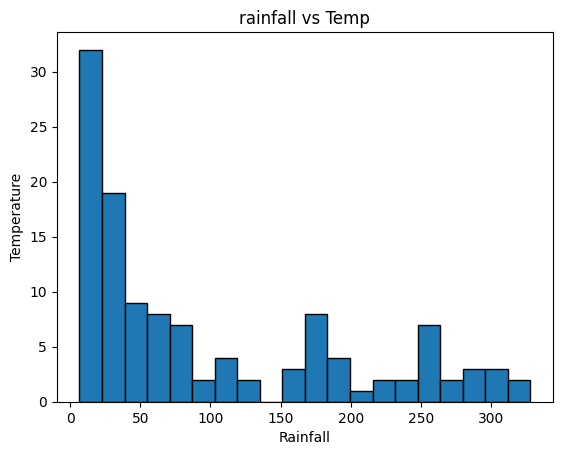

In [45]:
plt.hist(dataset['Rainfall'], bins=20, edgecolor='black')
plt.xlabel('Rainfall')
plt.ylabel('Temperature')
plt.title('rainfall vs Temp')
plt.show()

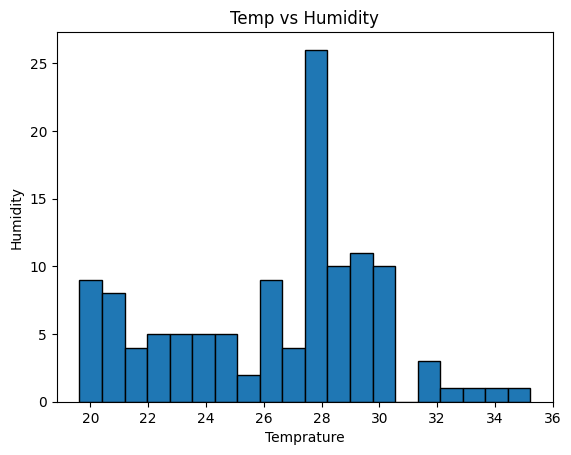

In [46]:
plt.hist(dataset['Temperature'], bins=20, edgecolor='black')
plt.xlabel('Temprature')
plt.ylabel('Humidity')
plt.title('Temp vs Humidity')
plt.show()

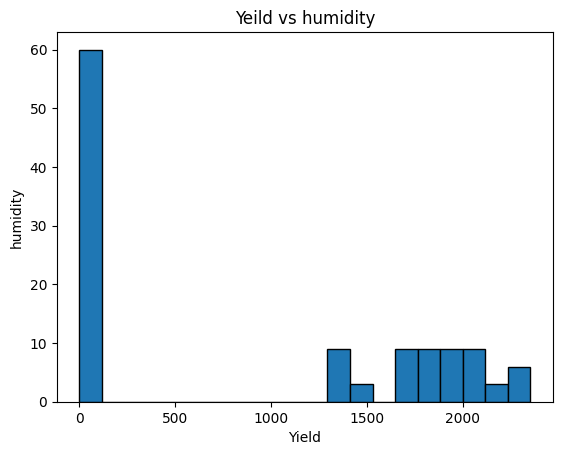

In [47]:
plt.hist(dataset['Yield'], bins=20, edgecolor='black')
plt.xlabel('Yield')
plt.ylabel('humidity')
plt.title('Yeild vs humidity')
plt.show()

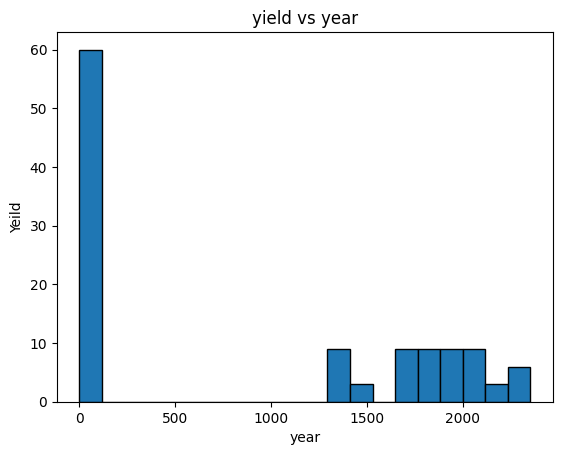

In [48]:
plt.hist(dataset['Yield'], bins=20, edgecolor='black')
plt.xlabel('year')
plt.ylabel('Yeild')
plt.title('yield vs year')
plt.show()

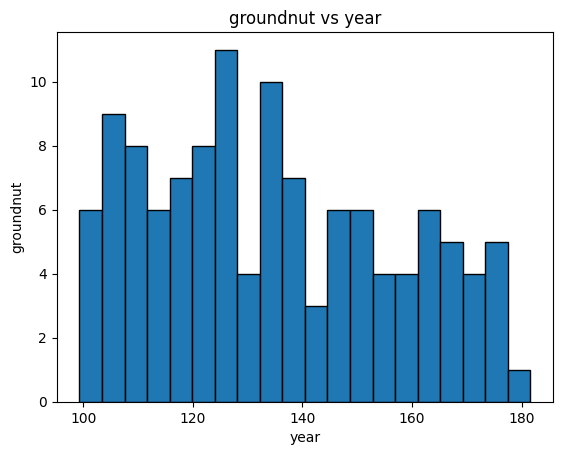

In [49]:
plt.hist(dataset['Groundnut'], bins=20, edgecolor='black')
plt.xlabel('year')
plt.ylabel('groundnut')
plt.title('groundnut vs year')
plt.show()

In [50]:
data=dataset
data1 = data.values
train_features = data1[:,0:data.shape[1]-1]
label_features = data1[:,data.shape[1]-1]
X_train, X_test, y_train, y_test = train_test_split(train_features, label_features, test_size = 0.2, random_state = 0)

In [51]:
print("Total records in dataset : "+str(len(train_features))+"\n")
print("80% dataset records used to train ML : "+str(len(X_train))+"\n")
print("20% dataset records used to test ML Accuracy : "+str(len(X_test))+"\n")


Total records in dataset : 120

80% dataset records used to train ML : 96

20% dataset records used to test ML Accuracy : 24



In [52]:
data.isnull().sum()

Month          0
Year           0
Rainfall       0
Temperature    0
Humidity       0
Yield          3
Groundnut      0
dtype: int64

In [53]:
data[data.Rainfall.isnull()]

,Month,Year,Rainfall,Temperature,Humidity,Yield,Groundnut


In [54]:
data[data.Month==1]

,Month,Year,Rainfall,Temperature,Humidity,Yield,Groundnut
0,1,2013,11.3,19.70,77,0.0,128.7
12,1,2014,19.2,19.77,87,0.0,100.7
24,1,2015,17.4,19.72,82,0.0,110.0
36,1,2016,19.3,20.45,83,0.0,123.3
48,1,2017,19.0,20.06,85,0.0,134.1
60,1,2018,19.2,19.90,79,0.0,113.4
72,1,2019,18.5,19.62,83,0.0,123.8
84,1,2020,28.3,19.65,85,0.0,139.0
96,1,2021,20.2,20.31,87,0.0,156.4
108,1,2022,39.5,24.99,85,0.0,167.3


In [55]:
dummy=pd.DataFrame([[]])
for i in range(1,13):
    temp=pd.DataFrame(data[data.Month==i])
    temp.Rainfall.fillna(temp.Rainfall.mean(),inplace=True)
    dummy=pd.concat([dummy,temp])

In [56]:
dummy.reset_index(drop=True,inplace=True)
dummy.drop(0,inplace=True)

In [57]:
dummy.reset_index(drop=True,inplace=True)
dummy.isnull().sum()

Month          0
Year           0
Rainfall       0
Temperature    0
Humidity       0
Yield          3
Groundnut      0
dtype: int64

In [58]:
data=dummy

In [59]:
data[data.Year==2022]

,Month,Year,Rainfall,Temperature,Humidity,Yield,Groundnut
9,1.0,2022.0,39.5,24.9900,85.0,0.0,167.3
19,2.0,2022.0,19.1,28.0386,72.0,0.0,165.7
29,3.0,2022.0,8.9,30.4741,62.0,2015.0,169.1
39,4.0,2022.0,38.2,33.9128,41.0,2015.0,171.2
49,5.0,2022.0,83.2,35.2268,53.0,2015.0,174.3
59,6.0,2022.0,152.2,33.4088,51.0,NaN,171.0
69,7.0,2022.0,327.2,32.3118,79.0,NaN,172.0
79,8.0,2022.0,264.0,31.5344,77.0,NaN,175.3
89,9.0,2022.0,181.4,31.9751,78.0,0.0,175.2
99,10.0,2022.0,111.8,32.0322,77.0,0.0,175.2


In [60]:
for i in range(1,13):
    month_split=data[data.Month==i]
    X=month_split.iloc[:,:6]
    Y=month_split.iloc[:,-1]
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.8,random_state=42+i)

In [61]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [62]:
predictions = model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)
from sklearn.metrics import r2_score              # r square method is used to measure the accuracy in Regression
a = r2_score(np.array(Y).reshape(-1,1),np.array(model.predict(X)).reshape(-1,1))
print(round(a,2)*100)

Mean Squared Error (MSE): 48.71406322239034
Mean Absolute Error (MAE): 5.668210214524606
R-squared: 0.9333399605040185
93.0


In [63]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(random_state=42)
model1.fit(X,Y)

RandomForestRegressor(random_state=42)

In [64]:
predictions = model1.predict(X_test)

mse1 = mean_squared_error(Y_test, predictions)
mae1 = mean_absolute_error(Y_test, predictions)
r21 = r2_score(Y_test, predictions)


print("Mean Squared Error (MSE):", mse1)
print("Mean Absolute Error (MAE):", mae1)
print("R-squared:", r21)

from sklearn.metrics import r2_score              # r square method is used to measure the accuracy in Regression
a1 = r2_score(np.array(Y).reshape(-1,1),np.array(model1.predict(X)).reshape(-1,1))
print(round(a1,2)*100)                             # Accuracy in Percentage
     

Mean Squared Error (MSE): 57.53046324999876
Mean Absolute Error (MAE): 6.15174999999992
R-squared: 0.9212756502170739
92.0


In [65]:
from sklearn import linear_model
model2 = linear_model.BayesianRidge()
model2.fit(X,Y)

BayesianRidge()

In [66]:
predictions = model2.predict(X_test)

mse2 = mean_squared_error(Y_test, predictions)
mae2 = mean_absolute_error(Y_test, predictions)
r22 = r2_score(Y_test, predictions)


print("Mean Squared Error (MSE):", mse2)
print("Mean Absolute Error (MAE):", mae2)
print("R-squared:", r22)

from sklearn.metrics import r2_score              # r square method is used to measure the accuracy in Regression
a2 = r2_score(np.array(Y).reshape(-1,1),np.array(model2.predict(X)).reshape(-1,1))
print(round(a2,2)*100)

Mean Squared Error (MSE): 48.40875768663565
Mean Absolute Error (MAE): 5.627583964709309
R-squared: 0.9337577388153623
92.0


In [67]:
from sklearn.neural_network import MLPRegressor

model3 = MLPRegressor(random_state=1, max_iter=500)
model3.fit(X,Y)


MLPRegressor(max_iter=500, random_state=1)

In [68]:
predictions = model3.predict(X_test)

mse3 = mean_squared_error(Y_test, predictions)
mae3 = mean_absolute_error(Y_test, predictions)
r23 = r2_score(Y_test, predictions)


print("Mean Squared Error (MSE):", mse3)
print("Mean Absolute Error (MAE):", mae3)
print("R-squared:", r23)
from sklearn.metrics import r2_score              # r square method is used to measure the accuracy in Regression
a3 = r2_score(np.array(Y).reshape(-1,1),np.array(model3.predict(X)).reshape(-1,1))
print(round(a3,2)*100)

Mean Squared Error (MSE): 945.3999691852332
Mean Absolute Error (MAE): 25.32149045465635
R-squared: -0.293679794224627
-25.0


In [69]:
from sklearn.svm import SVR
model4 = SVR(C=1.0, epsilon=0.2)
model4.fit(X,Y)


SVR(epsilon=0.2)

In [70]:
predictions = model4.predict(X_test)

mse4 = mean_squared_error(Y_test, predictions)
mae4 = mean_absolute_error(Y_test, predictions)
r24 = r2_score(Y_test, predictions)


print("Mean Squared Error (MSE):", mse4)
print("Mean Absolute Error (MAE):", mae4)
print("R-squared:", r24)
from sklearn.metrics import r2_score              # r square method is used to measure the accuracy in Regression
a4 = r2_score(np.array(Y).reshape(-1,1),np.array(model4.predict(X)).reshape(-1,1))
print(round(a4,2)*100)

Mean Squared Error (MSE): 776.5099791889751
Mean Absolute Error (MAE): 23.499900675414544
R-squared: -0.06257171867300859
-3.0


In [71]:
from sklearn.tree import DecisionTreeRegressor
model5 = DecisionTreeRegressor(random_state=42)
model5.fit(X,Y)

DecisionTreeRegressor(random_state=42)

In [76]:
predictions = model5.predict(X_test)

mse5 = mean_squared_error(Y_test, predictions)
mae5 = mean_absolute_error(Y_test, predictions)
r25 = r2_score(Y_test, predictions)


print("Mean Squared Error (MSE):", mse4)
print("Mean Absolute Error (MAE):", mae4)
print("R-squared:", r25)
from sklearn.metrics import r2_score              # r square method is used to measure the accuracy in Regression
a5 = r2_score(np.array(Y).reshape(-1,1),np.array(model5.predict(X)).reshape(-1,1))
print(round(a5,2)*100)

Mean Squared Error (MSE): 776.5099791889751
Mean Absolute Error (MAE): 23.499900675414544
R-squared: 1.0
100.0


In [77]:
results ={'Mean squared error': [mse,mse1,mse2,mse3,mse4,mse5],
 'Mean absolute error':[mae,mae1,mae2,mae3,mae4,mae5],
 'R2': [r2,r21,r22,r23,r24,r25],
 'Accuracy':[a,a1,a2,a3,a4,a5]}
index = ['linear regression','Random forest','Naive bayes','Neural networks','Svr','Decision tree']

In [78]:
results =pd.DataFrame(results,index=index)

In [79]:
print(results)

                   Mean squared error  Mean absolute error        R2  Accuracy
linear regression           48.714063             5.668210  0.933340  0.927136
Random forest               57.530463             6.151750  0.921276  0.923062
Naive bayes                 48.408758             5.627584  0.933758  0.922277
Neural networks            945.399969            25.321490 -0.293680 -0.253773
Svr                        776.509979            23.499901 -0.062572 -0.033745
Decision tree                0.000000             0.000000  1.000000  1.000000
